In [ ]:
'''
    Newton's method is known as an iterative process for finding successively 
better approximations for the roots of functions, given by the equation:
x(i+)=xi - f(xi)/f'(xi). By repeating this process, a sequence of 
approximations x1 , x2 … xi will approximate the roots of a function to a 
predetermined number of decimal places.As this process repeats, xi will become 
closer and closer to a certain number r. In other words, xi is converging to this
number r, which means that r is the approximated root for the original function.   
    Furthermore, Newton's method can be extended to also work in the complex 
plane.  In the complex plane, numbers exist in the form of where x and y are 
real numbers, and .  In the complex plane, roots other than real roots for 
polynomials exist and can be found using Newton's method.  The benefit of using
Newton's method in a complex plane is that each point in the complex plane can
be treated as the starting point, xi, and will converge to a root of a given 
function.  However, the number of iterations necessary for each xi to result 
in a root is different depending on how far away xi is from the actual root 
of the function.
'''

In [2]:
%pylab inline
from numpy import*

Populating the interactive namespace from numpy and matplotlib


In [3]:
#definiton the meshgrid
npts = 1000
#x = linspace(-1, 1, npts)
#y = linspace(-1j, 1j, npts)
x = linspace(-.001, .001, npts)
y = linspace(-.001j, .001j, npts)
X, Y = meshgrid(x,y)
Z = X + Y
#print Z

In [4]:
#application of newton's method
niters = 50
for i in range(niters):
    Z -= (Z**3 - 1)/(3*Z**2)

In [5]:
#definition of points of covergence
r1 = complex(1,0)
r2 = complex(-.5, .5*sqrt(3))
r3 = complex(-.5, -.5*sqrt(3))

In [6]:
#tolerance that will be used to assign color based on root
tol = 1e-5
reds = abs(Z - r1) < tol
greens = abs(Z - r2) < tol
blues = abs(Z - r3) < tol

#print "red=",reds
#print "\ngreen=",greens
#print "\nblue=",blues

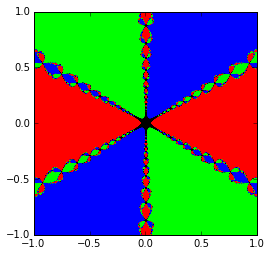

In [7]:
#indexs and displays results 
img = zeros((npts, npts, 3))
img[:,:,0] = reds
img[:,:,1] = greens
img[:,:,2] = blues

imshow(img[::-1], extent=[-1,1,-1,1])
#imshow(img[::-1], extent=[-.001,.001,-.001,.001])

In [37]:
npts = 1000
x = linspace(-1, 1, npts)
y = linspace(-1j, 1j, npts)
X, Y = meshgrid(x,y)
Z = X + Y

niters = 200
tol = 1e-10
r1 = complex(1,0)
r2 = complex(-.5, .5*sqrt(3))
r3 = complex(-.5, -.5*sqrt(3))

reds = zeros(shape(Z))
greens = zeros(shape(Z))
blues = zeros(shape(Z))

for i in range(niters):
    Z -= (Z**3 - 1)/(3*Z**2)
    
    # Evaluate only those points that are still at zero
    f = reds == 0
    # sets the value to the current iteration if (abs(Z[f] - r1) < tol) is true
    reds[f] = (abs(Z[f] - r1) < tol)*i
    
    f = greens == 0
    greens[f] = (abs(Z[f] - r2) < tol)*i

    f = blues == 0
    blues[f] = (abs(Z[f] - r3) < tol)*i
    

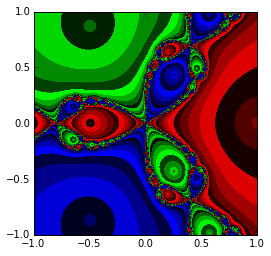

In [38]:
#multiply by 255 to rescale to 8 bit number to show
#how many iterations till random point converged to a root
img = zeros((npts, npts, 3))
img[:,:,0] = 255.*reds/np.max(reds)
img[:,:,1] = -255.*greens/np.max(greens)
img[:,:,2] = -255.*blues/np.max(blues)

imshow(img[::-1], extent=[-1,1,-1,1])